# composite_DomeF_JJA

In [1]:
import warnings
warnings.simplefilter("ignore")
import statsmodels.api as sm
import numpy as np
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
#
import seaborn as sns

In [2]:
# 描画設定
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.family': 'sans-serif', 'text.usetex': False,'pcolor.shading':'auto'})

In [3]:
class Site:
    def DomeF(self):
        # DomeF
        # 南緯77度19分01秒 東経39度42分12秒座標: 南緯77度19分01秒 東経39度42分12秒
        sx=14 ; sy=60 #;; # 77°18′59″S 39°42′04″E
        df_lat=-77.3
        df_lon=39.66
        return df_lon,df_lat,sx,sy
df_lon,df_lat,df_x,df_y = Site().DomeF()    

## Regression for simulation results

In [4]:
loadfile = "T2_anom.npz"
dataset = np.load(loadfile)
T2 = dataset["T2"]
lon2 = dataset["lon2"]
lat2 = dataset["lat2"]
y = dataset["y"]
m = dataset["m"]
d = dataset["d"]

In [5]:
loadfile = "prcp.npz"
dataset = np.load(loadfile)
prcp = dataset["prcp"]

In [6]:
loadfile = "prcp_d18O_anom.npz"
dataset = np.load(loadfile)
prcp_d18O = dataset["prcp_d18O"]

In [7]:
loadfile = "sam.npz"
dataset = np.load(loadfile)
sam  = dataset["sam"]

In [8]:
label_sam_p="Positive Southern Annular Mode"
label_sam_m="Negative Southern Annular Mode"

In [9]:
m_p = m[sam>=1.0]
m_m = m[sam<=-1.0]

In [10]:
T2_sam_p = T2[df_x-1,df_y-1,sam>=1.0]
T2_sam_m = T2[df_x-1,df_y-1,sam<=-1.0]

In [11]:
prcp_sam_p = prcp[df_x-1,df_y-1,sam>=1.0]
prcp_sam_m = prcp[df_x-1,df_y-1,sam<=-1.0]

In [12]:
prcp_d18O_sam_p = prcp_d18O[df_x-1,df_y-1,sam>=1.0]
prcp_d18O_sam_m = prcp_d18O[df_x-1,df_y-1,sam<=-1.0]

In [13]:
colorm="lightgray"
colorp="gray"

In [14]:
xlim=(-20,32)
ylim=(-40,50)
T2a_label="Surface Air Temperature Anomaly [K]"
prcp_d18Oa_label="$\mathrm{\delta ^{18} O_p}$ Anomaly [‰]"

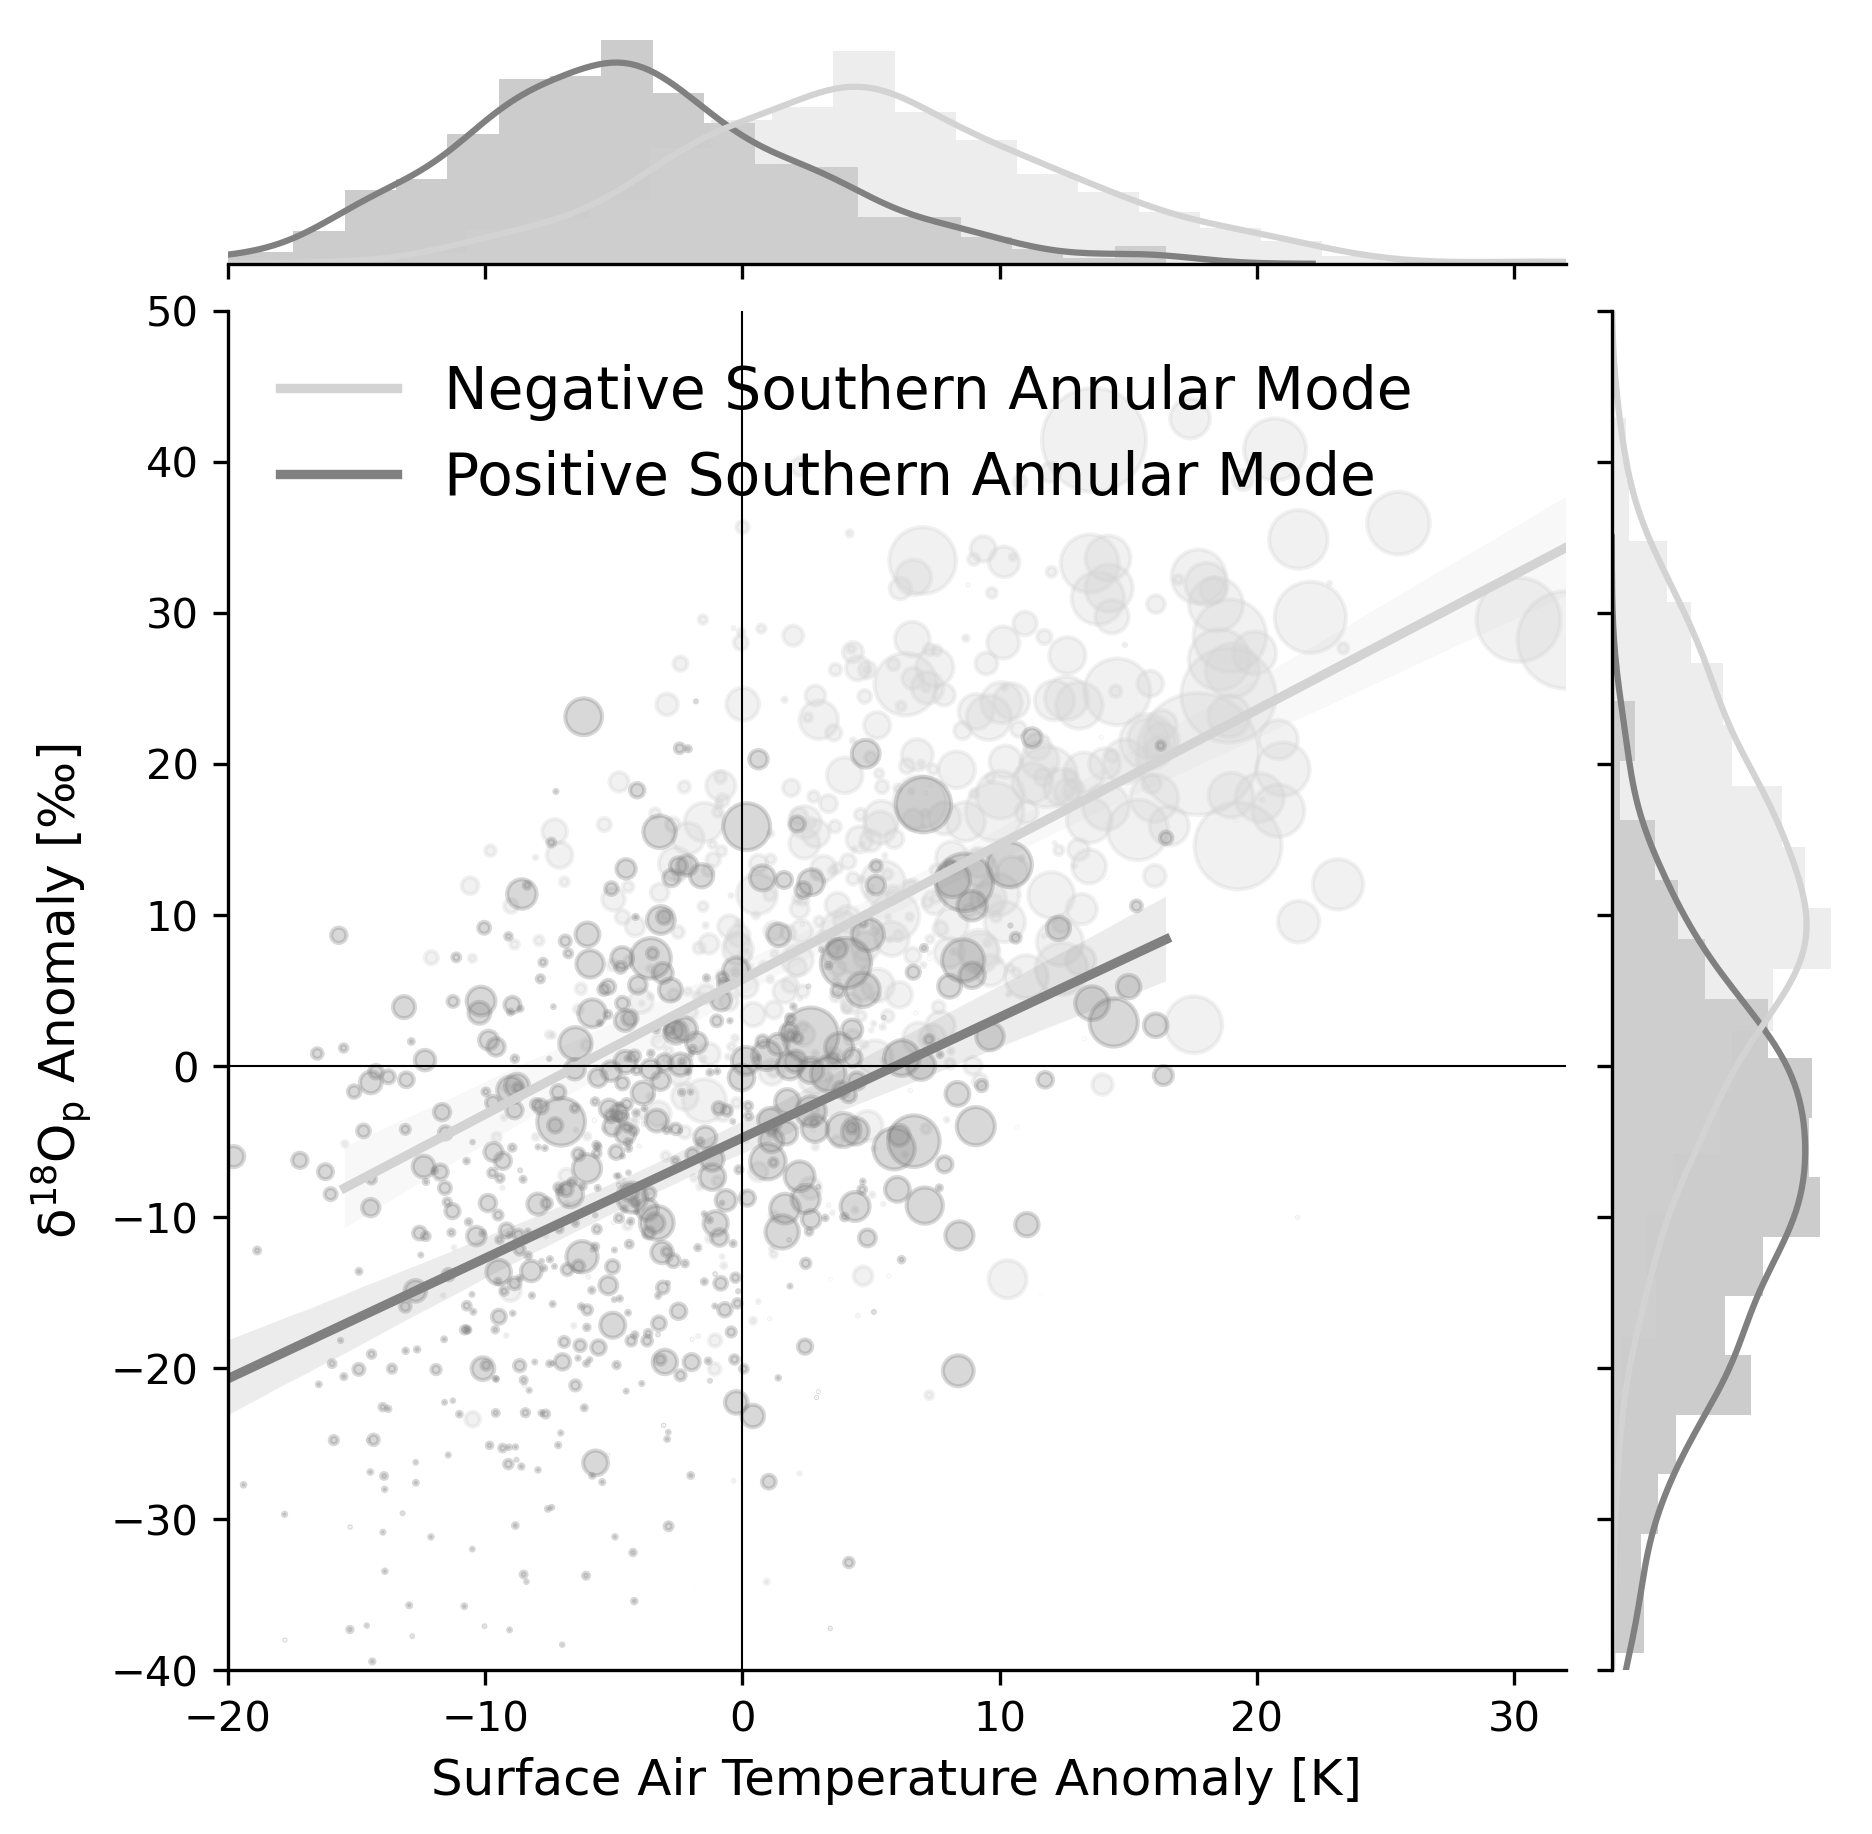

In [22]:
sam_JJA_p=pd.DataFrame({
    "T2": T2_sam_p[(m_p==6)+(m_p==7)+(m_p==8)],
    "prcp": prcp_sam_p[(m_p==6)+(m_p==7)+(m_p==8)],
    "prcp_d18O": prcp_d18O_sam_p[(m_p==6)+(m_p==7)+(m_p==8)]
})
sam_JJA_m=pd.DataFrame({
    "T2": T2_sam_m[(m_m==6)+(m_m==7)+(m_m==8)],
    "prcp": prcp_sam_m[(m_m==6)+(m_m==7)+(m_m==8)],
    "prcp_d18O": prcp_d18O_sam_m[(m_m==6)+(m_m==7)+(m_m==8)]
})
#
g=sns.JointGrid()

ax1=sns.regplot("T2","prcp_d18O",sam_JJA_m,scatter_kws={"s":sam_JJA_m["prcp"]*300,"alpha":0.3},fit_reg=True,color=colorm,label=label_sam_m,ax=g.ax_joint)
b_ax, a_ax= sm.OLS(sam_JJA_m["prcp_d18O"],sm.add_constant(sam_JJA_m["T2"])).fit().params[0:2]
ax_regm = "$y = {:4.2f}x + {:4.2f}$".format(a_ax,b_ax)

ax=sns.regplot("T2","prcp_d18O",sam_JJA_p,scatter_kws={"s":sam_JJA_p["prcp"]*300,"alpha":0.3},fit_reg=True,color=colorp,label=label_sam_p,ax=g.ax_joint)
b_ax, a_ax= sm.OLS(sam_JJA_p["prcp_d18O"],sm.add_constant(sam_JJA_p["T2"])).fit().params[0:2]
ax_regp = "$y = {:4.2f}x {:4.2f}$".format(a_ax,b_ax)

sns.distplot(sam_JJA_p["T2"],color=colorp,ax=g.ax_marg_x)
sns.distplot(sam_JJA_m["T2"],color=colorm,ax=g.ax_marg_x)
sns.distplot(sam_JJA_p["prcp_d18O"],color=colorp,ax=g.ax_marg_y,vertical=True)
sns.distplot(sam_JJA_m["prcp_d18O"],color=colorm,ax=g.ax_marg_y,vertical=True)

ax.set_xlabel(T2a_label,fontsize=12)
ax.set_ylabel(prcp_d18Oa_label,fontsize=12)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.axhline(y=0,color="k",ls="-",linewidth=0.5)
ax.axvline(x=0,color="k",ls="-",linewidth=0.5)

plt.tick_params(labelsize=24)
handles, labels = ax.get_legend_handles_labels()
labels = [labels[0],labels[1]]
handles=ax.lines[:2]
ax.legend(handles,labels,loc="upper left",frameon=False, fontsize=14)

plt.tick_params(labelsize=24)
plt.show()
g.savefig("composite_DomeF_JJA_grayscale.png")

Kanon Kino (kanon[at]aori.u-tokyo.ac.jp)